<a href="https://colab.research.google.com/github/praveenpareek11/HotelReviewAnalysis/blob/master/keyword_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas
from scipy.sparse import coo_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [0]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
dataset = pandas.read_csv('/content/drive/My Drive/Colab Notebooks/data/Hotel_Reviews.csv')
dataset.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [0]:
dataset['word_count'] = dataset['Negative_Review'].apply(lambda x: len(str(x).split(" ")))
dataset[['Negative_Review','word_count']].head()

,Negative_Review,word_count
0,I am so angry that i made this post available...,397
1,No Negative,2
2,Rooms are nice but for elderly a bit difficul...,42
3,My room was dirty and I was afraid to walk ba...,210
4,You When I booked with your company on line y...,140


In [0]:
dataset.word_count.describe()

count    515738.000000
mean         19.035384
std          29.392220
min           1.000000
25%           2.000000
50%           9.000000
75%          23.000000
max         408.000000
Name: word_count, dtype: float64

In [0]:
freq = pandas.Series(' '.join(dataset['Negative_Review']).split()).value_counts()[:5]
freq

the    423240
was    234097
to     227172
a      219587
and    215427
dtype: int64

In [0]:
freq1 =  pandas.Series(' '.join(dataset['Negative_Review']).split()).value_counts()[-5:]
freq1

100lbs        1
drlong        1
imbarassed    1
renturned     1
greatto       1
dtype: int64

In [0]:
nltk.download('wordnet')
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely


In [0]:
##Creating a list of stop words and adding custom stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

In [0]:
corpus = []
for i in range(0, 515730):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['Negative_Review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [0]:
corpus[100]

'building work starting waking u mention building work booking com hotel web page say renovation would noise disturbance also air conditioning loud'

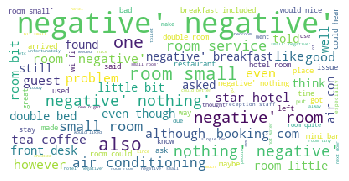

In [0]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [0]:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [0]:
list(cv.vocabulary_.keys())[:10]

['angry',
 'made',
 'post',
 'available',
 'via',
 'possible',
 'site',
 'use',
 'trip',
 'one']

[Text(0, 0, 'room'),
 Text(0, 0, 'negative'),
 Text(0, 0, 'hotel'),
 Text(0, 0, 'breakfast'),
 Text(0, 0, 'small'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'nothing'),
 Text(0, 0, 'bed'),
 Text(0, 0, 'would'),
 Text(0, 0, 'could'),
 Text(0, 0, 'one'),
 Text(0, 0, 'night'),
 Text(0, 0, 'bathroom'),
 Text(0, 0, 'bit'),
 Text(0, 0, 'time'),
 Text(0, 0, 'little'),
 Text(0, 0, 'like'),
 Text(0, 0, 'shower'),
 Text(0, 0, 'good'),
 Text(0, 0, 'day')]

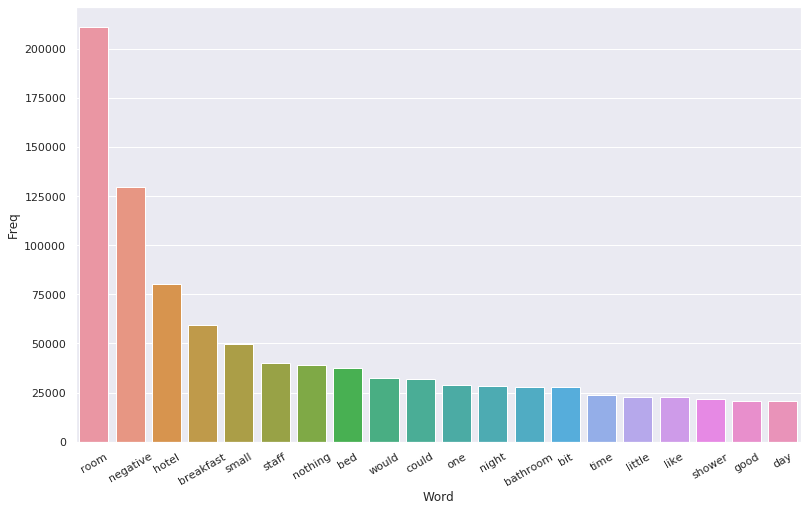

In [0]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [0]:
corpus = []
for i in range(0, 515730):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['Negative_Review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text] 
    text = " ".join(text)
    corpus.append(text)

[('room wa', 32869),
 ('breakfast wa', 11012),
 ('small room', 6980),
 ('bed wa', 6813),
 ('wa bit', 6626),
 ('room service', 6334),
 ('air conditioning', 5525),
 ('star hotel', 5403),
 ('wa little', 5377),
 ('booking com', 4586)]
            Bi-gram   Freq
0           room wa  32869
1      breakfast wa  11012
2        small room   6980
3            bed wa   6813
4            wa bit   6626
5      room service   6334
6  air conditioning   5525
7        star hotel   5403
8         wa little   5377
9       booking com   4586


[Text(0, 0, 'room wa'),
 Text(0, 0, 'breakfast wa'),
 Text(0, 0, 'small room'),
 Text(0, 0, 'bed wa'),
 Text(0, 0, 'wa bit'),
 Text(0, 0, 'room service'),
 Text(0, 0, 'air conditioning'),
 Text(0, 0, 'star hotel'),
 Text(0, 0, 'wa little'),
 Text(0, 0, 'booking com')]

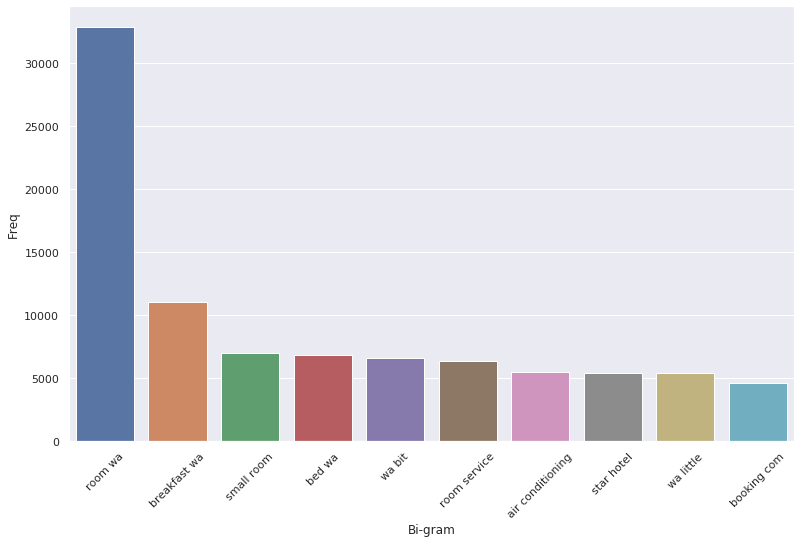

In [0]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    
    index = []
    for t in words_freq:
        if (t[0].partition(' ')[0] in stop_words) or (t[0].partition(' ')[-1] in stop_words):
            index.append(words_freq.index(t))
            

    for i in sorted(index, reverse = True):
        del words_freq[i]
        
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=10)
from pprint import pprint
pprint(top2_words)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [0]:
corpus_trigram = []
for i in range(0, 515730):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['Negative_Review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text] 
    text = " ".join(text)
    corpus_trigram.append(text)

In [0]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    index = []
    for t in words_freq:
        if (t[0].partition(' ')[0] in stop_words) or (t[0].partition(' ')[-1].partition(' ')[-1] in stop_words):
            index.append(words_freq.index(t))
            

    for i in sorted(index, reverse = True):
        del words_freq[i]
    return words_freq[:n]

           Tri-gram  Freq
0     wa very small  3204
1   value for money  2122
2     room wa small  1728
3    wa not working  1687
4  would have liked  1622
5       room wa bit  1498
6    tea and coffee  1489
7    room wa little  1393
8      wa too small  1268
9   could be better  1212


[Text(0, 0, 'wa very small'),
 Text(0, 0, 'value for money'),
 Text(0, 0, 'room wa small'),
 Text(0, 0, 'wa not working'),
 Text(0, 0, 'would have liked'),
 Text(0, 0, 'room wa bit'),
 Text(0, 0, 'tea and coffee'),
 Text(0, 0, 'room wa little'),
 Text(0, 0, 'wa too small'),
 Text(0, 0, 'could be better')]

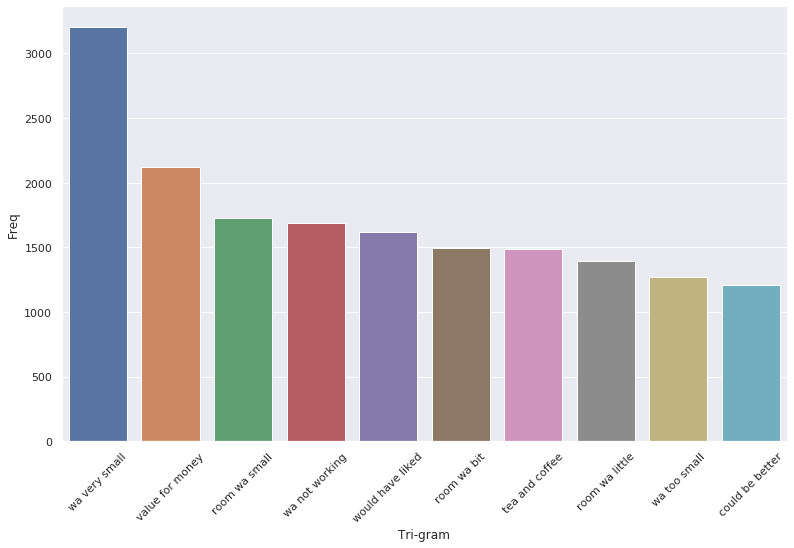

In [0]:
top3_words = get_top_n3_words(corpus_trigram, n=10)

top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams

sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [0]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[100]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [0]:
#Function for sorting tf_idf in descending order
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
building work starting at am waking u up no mention of building work on booking com and on hotel web page it doe say renovation but not that there would be noise disturbance also air conditioning very very loud

Keywords:
building work 0.395
building 0.303
disturbance 0.254
work 0.252
booking com hotel 0.241
